# Should you find a job in the Western World?

### Business Understanding
For this project, I was interestested in using Stack Overflow data from 2017 to better understand:

- As a programmer, should I go to work in the western world (e.g. America, Europe, etc.) or remain in the eastern world (e.g. India, China, etc.)?
- What is the salary difference in the western world and in the eastern world?
- How are the programmers satisfying about their job between these two sides of the world?
- Are there more jobs opportunity in the western world than that in the eastern world?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Data Understanding
First, we provide a general view to our data.
for example, what kind of developer they are and where are they come from.
Also, let's have a quick look on their employment status and how they think about their salary.


In [2]:
#Read the data and glimpse it
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

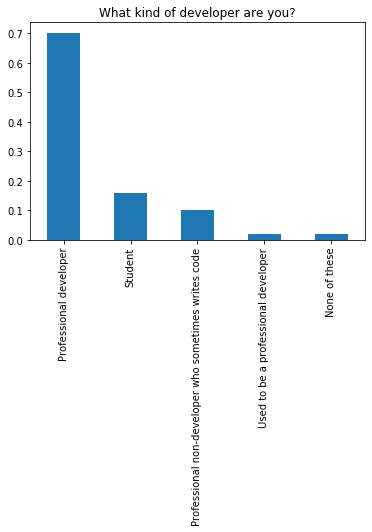

In [4]:
#Provide a pandas series of the counts for each Professional status
display_bar_chart(df, "Professional", "What kind of developer are you?")

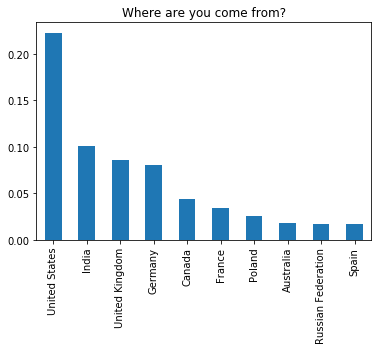

In [5]:
#Provide a pandas series of the counts for each Country
display_bar_chart(df, "Country", "Where are you come from?")

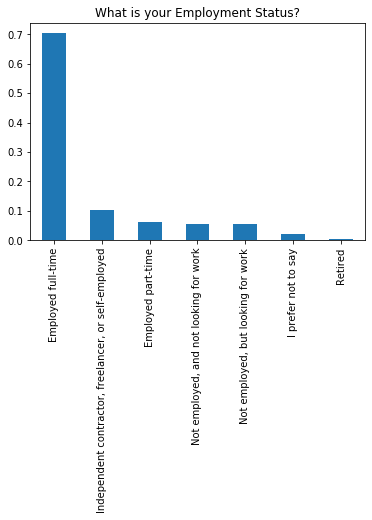

In [6]:
#Provide a pandas series of the counts for each Employment status
display_bar_chart(df, "EmploymentStatus", "What is your Employment Status?")

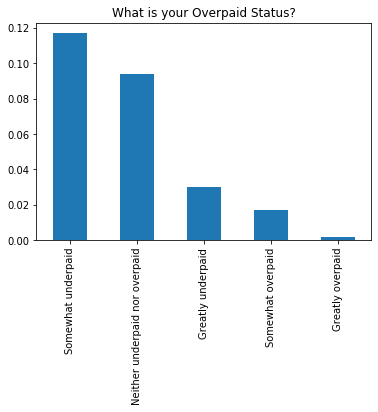

In [7]:
#Provide a pandas series of the counts for each Overpaid status
display_bar_chart(df, "Overpaid", "What is your Overpaid Status?")

### Data preparation
For categorical variables "Country", we seperate them into three sectors: western, eastern and other.
The following code define the lists of related countries and create a new column to identify whether that person lives in the west or in the east.

In [8]:
def handling_country(df):
    '''
    
    Return a dataframe with country seperate into west and east
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column west_or_east
    
    '''
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, eastern and other
    # The following lists define the countries to western and eastern
    western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
    #Add a new catagory seperating to western and eastern
    df['west_or_east'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))
    
    return df

Here we select some useful columns for our analysis.
- Country: Country they are living
- YearsCodedJob: Years they are coding
- EmploymentStatus: Their employment status
- Salary: Their Salary
- JobSatisfaction & CareerSatisfaction: Are their satisfy their job and career
- Overpaid: How they think about their salary

We especially focus on employed full-time professional developer.

In [9]:
def data_preparation(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    useful_df: a filtered dataframe with only useful columns
    
    '''
    #Get some useful columns for analysis
    useful_columns = ['Country', 'YearsCodedJob', 'EmploymentStatus', 'CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'west_or_east', 'Overpaid']
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female') and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [10]:
#Get some useful columns for analysis
df = handling_country(df)
useful_df = data_preparation(df)
useful_df.head()

,Country,YearsCodedJob,EmploymentStatus,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,west_or_east,Overpaid
2,United Kingdom,20 or more years,Employed full-time,8.0,9.0,NaN,NaN,113750.0,western,Neither underpaid nor overpaid
7,Poland,7 to 8 years,Employed full-time,7.0,7.0,"I'm not actively looking, but I am open to new...",1.0,NaN,western,NaN
8,Colombia,7 to 8 years,Employed full-time,6.0,6.0,I am not interested in new job opportunities,2.0,NaN,other,Neither underpaid nor overpaid
13,Germany,15 to 16 years,Employed full-time,8.0,6.0,I am actively looking for a job,3.0,NaN,western,NaN
14,United Kingdom,20 or more years,Employed full-time,8.0,8.0,NaN,NaN,100000.0,western,Somewhat underpaid


For categorical variable Overpaid, we transfer it to calculatable integer value because we want to find out the mean of their opinion.
The following code shows the mapping.

In [11]:
def handling_overpaid(df):
    """
    
    Convert Overpaid from words to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with Overpaid column becomes measurable
    
    """
    overpaid_map = {
        'Greatly underpaid' : 1,
        'Somewhat underpaid' : 2,
        'Neither underpaid nor overpaid' : 3,
        'Somewhat overpaid' : 4,
        'Greatly overpaid' : 5,
        np.nan: np.nan
    }
    df['Overpaid'] = df['Overpaid'].apply(lambda x: np.nan if x == np.nan else overpaid_map[x] )
    
    return df

Here we group the dataframe by west_or_east and YearsCodedJob, and get their mean, it automatically ignore the missing or null value.

In [12]:
#Compare selected indicators between western and eastern
useful_df = handling_overpaid(useful_df)
comparison = useful_df.groupby(['west_or_east','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  \
west_or_east YearsCodedJob                                           
eastern      1 to 2 years                6.624444         5.891111   
             10 to 11 years              7.500000         6.550000   
             11 to 12 years              7.342857         6.828571   
             12 to 13 years              7.176471         6.088235   
             13 to 14 years              7.333333         7.666667   
...                                           ...              ...   
western      6 to 7 years                7.644114         7.177267   
             7 to 8 years                7.532209         7.179724   
             8 to 9 years                7.558304         7.072438   
             9 to 10 years               7.476000         6.988000   
             Less than a year            7.811526         7.648438   

                               HoursPerWeek        Salary  Overpaid  
west_or_east YearsCodedJob                                           
eastern      1 to 2 years          5.653696   7742.553472  2.082418  
             10 to 11 years        3.720000  33318.461069  2.461538  
             11 to 12 years        3.733333  41902.774227  2.384615  
             12 to 13 years        4.937500  53430.910772  2.428571  
             13 to 14 years       26.000000  50170.185287  2.500000  
...                                     ...           ...       ...  
western      6 to 7 years          2.211039  69648.807261  2.446512  
             7 to 8 years          2.138060  70236.572056  2.431525  
             8 to 9 years          2.096491  76314.628263  2.432927  
             9 to 10 years         2.148026  74142.281505  2.430524  
             Less than a year      1.818627  47639.855006  2.510870  

[63 rows x 5 columns]

For categorical variable YearsCodedJob, we transfer it to calculatable integer value because we want to find out the mean of how long they have been coded.
The following code shows the mapping.

In [13]:
def handling_yearscodedjob(df):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    """
    year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [14]:
comparison_graph = handling_yearscodedjob(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')

In [15]:
comparison_graph.set_index('YearsCodedJob', inplace=True)

### Restuls Evaluation
In this section, we will display the findings and discuss about it.

Here you can see a programmer’s salary in the east is much lower than that in the west no matter how many years you are coding.

Text(0, 0.5, 'Average Salary')

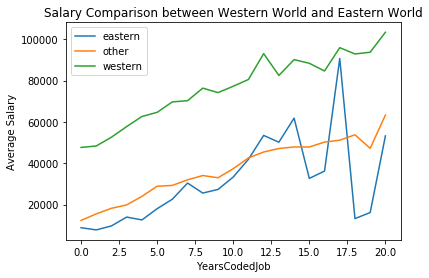

In [16]:
#Plot the Salary Comparison between Western World and Eastern World
comparison_graph.groupby('west_or_east')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Western World and Eastern World");
plt.xlabel('YearsCodedJob')
plt.ylabel('Average Salary')

The lines represent how they think they are overpaid, with a higher mark indicates the more they think they are overpaid.

You can see that eastern programmers (blue line) feel more underpaid in their whole careers than western programmers (green line)

Text(0, 0.5, 'Overpaid')

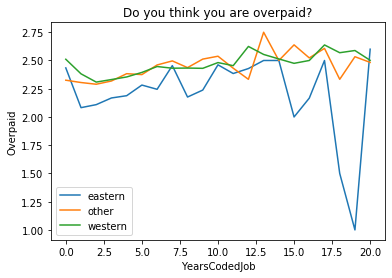

In [17]:
#Plot how the programmer thinks they are overpaid or not
comparison_graph.groupby('west_or_east')['Overpaid'].plot(legend=True)
plt.title("Do you think you are overpaid?");
plt.xlabel('YearsCodedJob')
plt.ylabel('Overpaid')

In [18]:
comparison.groupby('west_or_east').mean().CareerSatisfaction

west_or_east
eastern    7.123803
other      7.503250
western    7.576207
Name: CareerSatisfaction, dtype: float64

In [19]:
comparison.groupby('west_or_east').mean().JobSatisfaction

west_or_east
eastern    6.623020
other      7.062847
western    7.122752
Name: JobSatisfaction, dtype: float64

In [20]:
comparison.groupby('west_or_east').mean().Salary/50

west_or_east
eastern     627.927284
other       743.536241
western    1529.287081
Name: Salary, dtype: float64

Here, we can see that western programmers (blue ball) have a much higher satisfaction on their job and career, positioned at the right-high-up corner. The ball size indicator their average salary, the blue ball size is much larger than the red ball (eastern programmers salary).

Text(0, 0.5, 'Job Satisfaction')

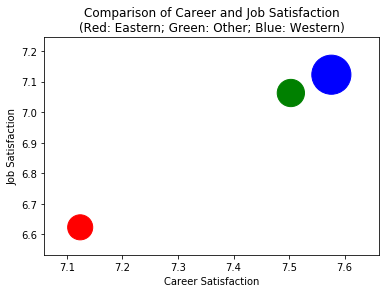

In [21]:
#Plot Comparison of Career and Job Satisfaction between Western and Eastern
plt.scatter(comparison.groupby('west_or_east').mean().CareerSatisfaction, comparison.groupby('west_or_east').mean().JobSatisfaction, comparison.groupby('west_or_east').mean().Salary/50, c=['red','green','blue'])

plt.title('Comparison of Career and Job Satisfaction\n(Red: Eastern; Green: Other; Blue: Western)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

### Conclusion
- We compared the salary based on Years a programmer has been coded between the eastern world and the western world. We found that the salary of an eastern programmer is much lower than that of the western no matter how many years they are coded.
- We then looked at how different between the viewpoints that both west and east think if they are underpaid. This showed that more eastern programmers always think that they are underpaid than the western programmers no matter how many years they are coded.
- Finally, we found that the Career and Job Satisfaction of the western programmers are much higher than those of the eastern programmers.